## I Utiliser un modèle de deep-learning avec Keras

In [10]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

On garde un encodage de fréquence, ici countvectorizer et on le met en place avec scikit learn

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(twenty_train.data)
X_matrix_train = vectorizer.transform(twenty_train.data)
X_matrix_test  = vectorizer.transform(twenty_test.data)

In [51]:
X_matrix_train.shape

(2257, 35788)

In [24]:
from keras.models import Sequential
from keras import layers

# La première couches a autant de neurones que mon vocabulaire a de mots (= nb de features)
input_dim = X_matrix_train.shape[1]  # Number of features

# Je définis l'architecture de mon réseau de neurones
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# Classification multinomial donc soft max et 4 classes à prédire donc 4 neuones
model.add(layers.Dense(4, activation='softmax'))

In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                357890    
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 357,934
Trainable params: 357,934
Non-trainable params: 0
_________________________________________________________________


In [29]:
# je dois trasnformer ma variable cible en dummies 
# afin que chaque neurone de la dernière couche ait sa propre colone.
from keras.utils import np_utils
dummy_y_train = np_utils.to_categorical( twenty_train.target)
dummy_y_test = np_utils.to_categorical( twenty_test.target)

In [31]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
history = model.fit(X_matrix_train,dummy_y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_matrix_test, dummy_y_test),
                    batch_size=10)

In [49]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

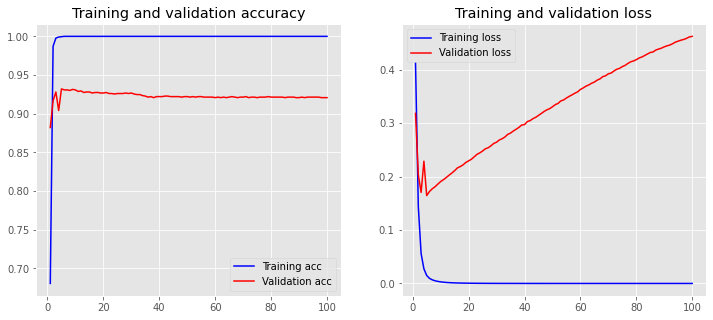

In [50]:
plot_history(history)